In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob,os
import pandas as pd
import hddm
import kabuki


plt.style.use('seaborn-ticks')

/home/gweindel/anaconda3/envs/hddm/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Convergence behavioral models

In [2]:
MS_names = ["Exp1_depends_M6","Exp2_depends_M6"]#For easiness I only plot diagnostics for winning model but it can be expanded to all models with the list below :
#["Exp1_depends_M1","Exp1_depends_M2","Exp1_depends_M3","Exp1_depends_M4","Exp1_depends_M5","Exp1_depends_M6",
#   "Exp2_depends_M1","Exp2_depends_M2","Exp2_depends_M3","Exp2_depends_M4","Exp2_depends_M5","Exp2_depends_M6"]

__________________________________________________________________

Exp1_depends_M6
mkdir: impossible de créer le répertoire « Exp1_depends_M6 »: Le fichier existe
Plotting a(Accuracy)
Plotting a(Speed)
Plotting a_std
Plotting v(Accuracy.0.01)
Plotting v(Accuracy.0.025)
Plotting v(Accuracy.0.07)
Plotting v(Accuracy.0.15)
Plotting v(Accuracy.0.3)
Plotting v(Speed.0.01)
Plotting v(Speed.0.025)
Plotting v(Speed.0.07)
Plotting v(Speed.0.15)
Plotting v(Speed.0.3)
Plotting v_std
Plotting t(Accuracy)
Plotting t(Speed)
Plotting t_std
Plotting sv
Plotting sz(Accuracy)
Plotting sz(Speed)
Plotting st


/home/gweindel/anaconda3/envs/hddm/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting z
Plotting z_std
Rhat : 
1.0135984598275085
__________________________________________________________________

Exp2_depends_M6
Plotting a(Accuracy)
Plotting a(Speed)
Plotting a_std
Plotting v(Accuracy.0.01)
Plotting v(Accuracy.0.07)
Plotting v(Accuracy.0.15)
Plotting v(Speed.0.01)
Plotting v(Speed.0.07)
Plotting v(Speed.0.15)
Plotting v_std
Plotting t(Accuracy)
Plotting t(Speed)
Plotting t_std
Plotting sv
Plotting sz(Accuracy)
Plotting sz(Speed)
Plotting st
Plotting z
Plotting z_std
Rhat : 
1.0094287463391818


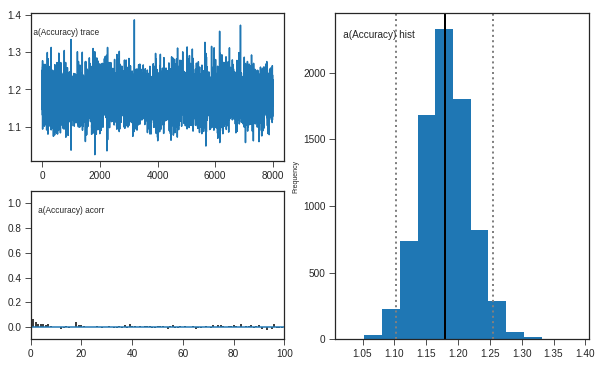

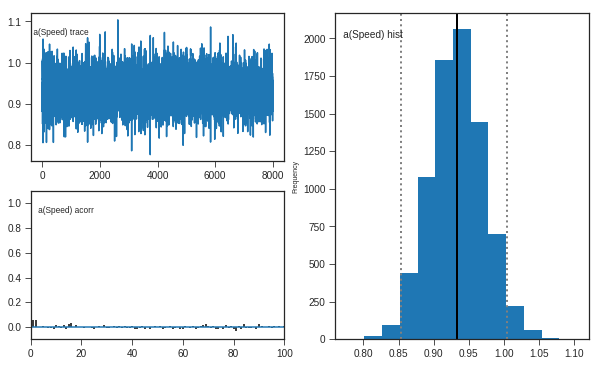

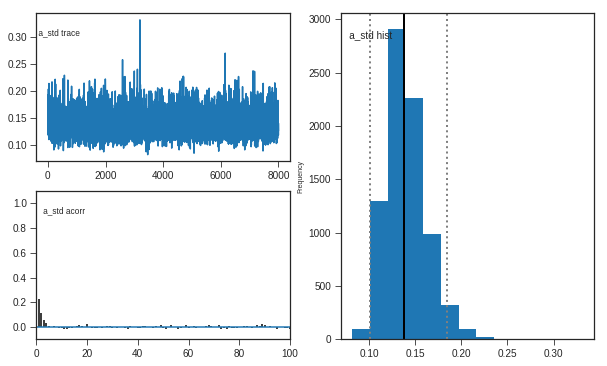

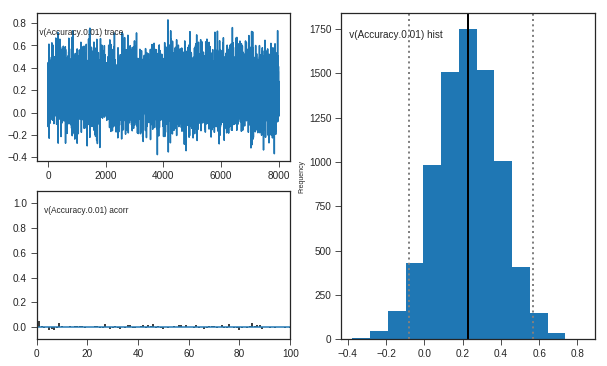

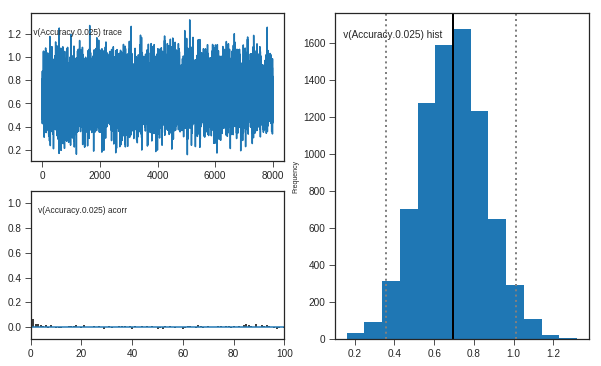

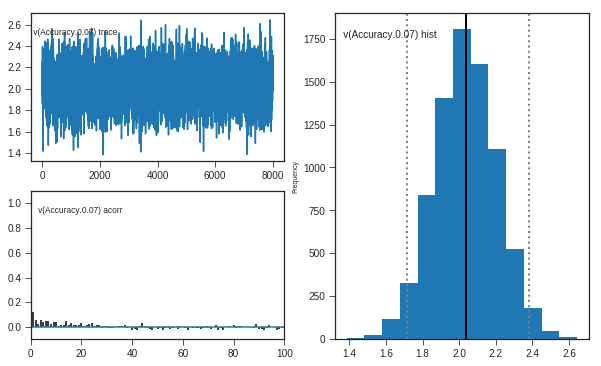

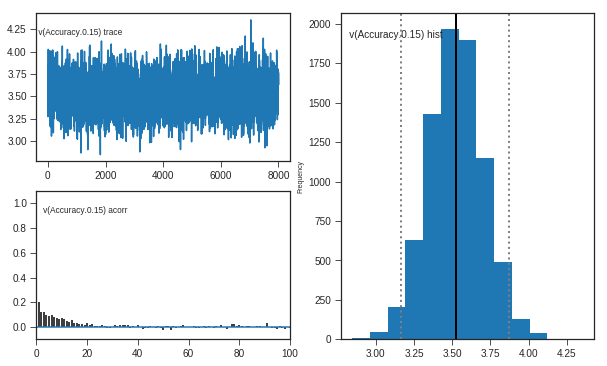

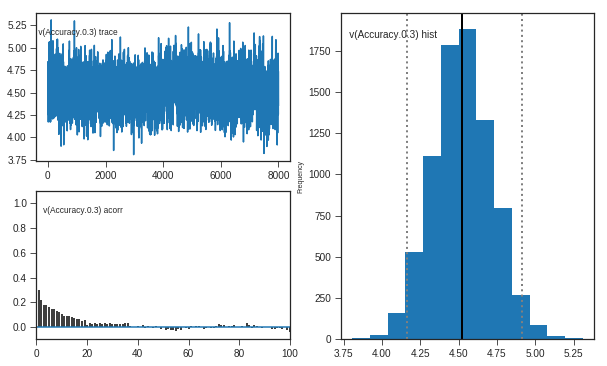

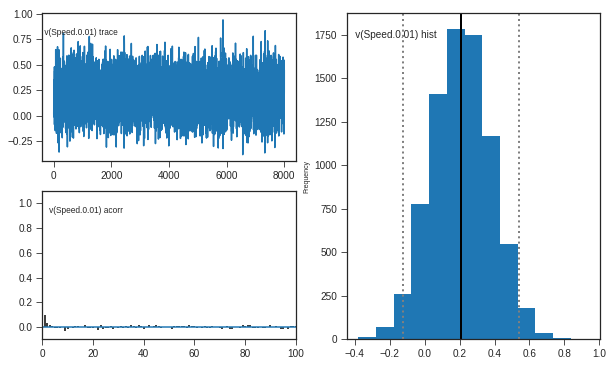

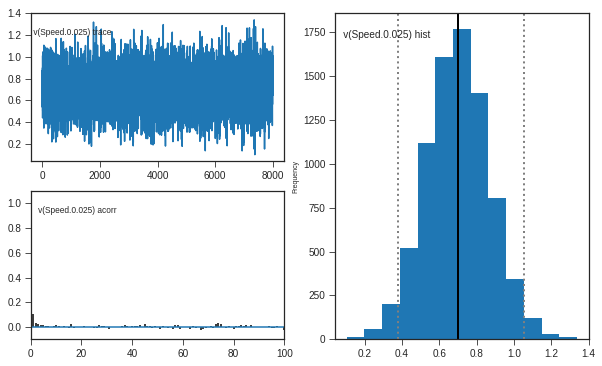

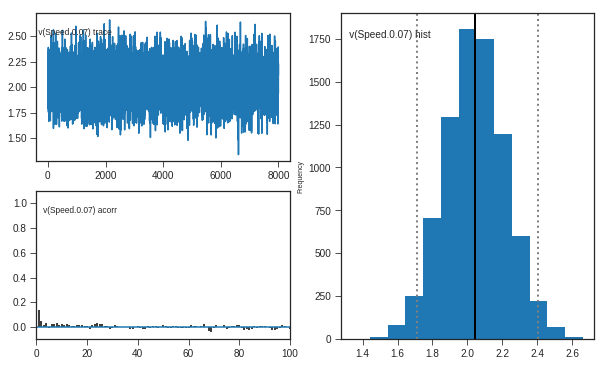

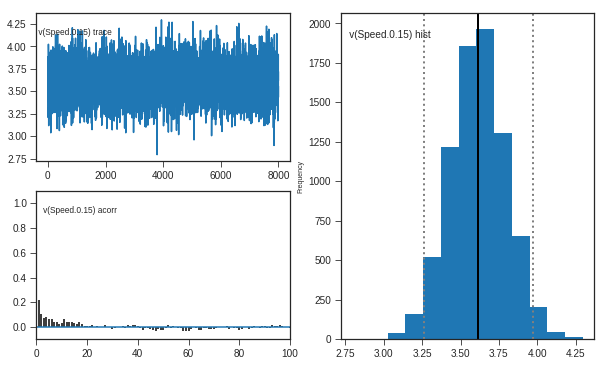

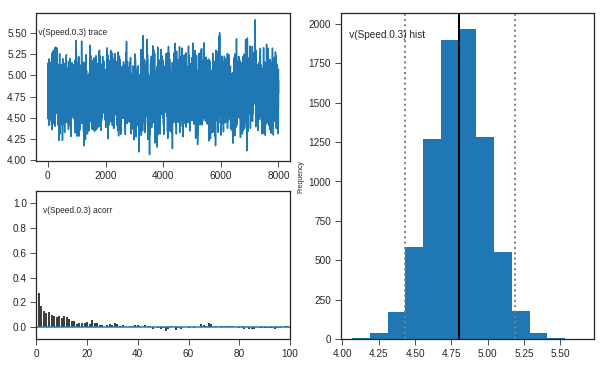

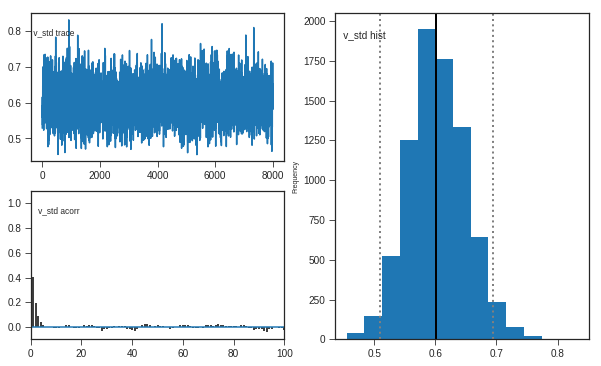

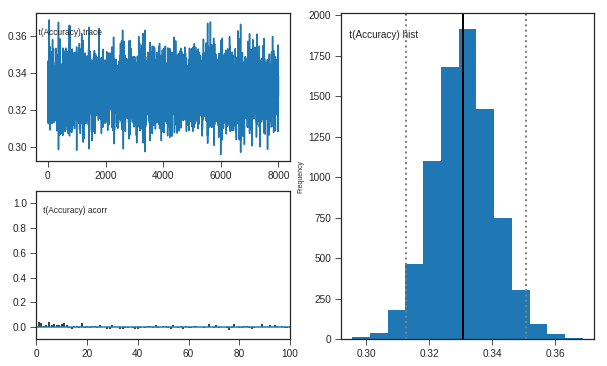

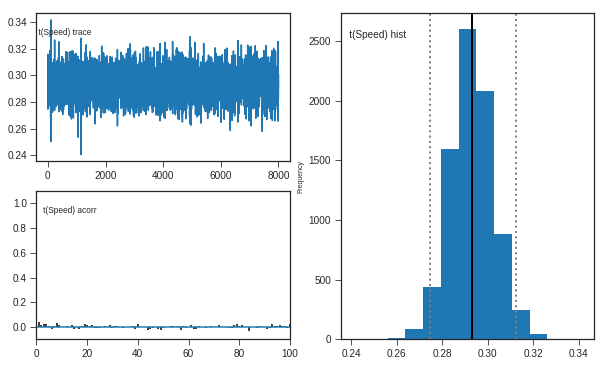

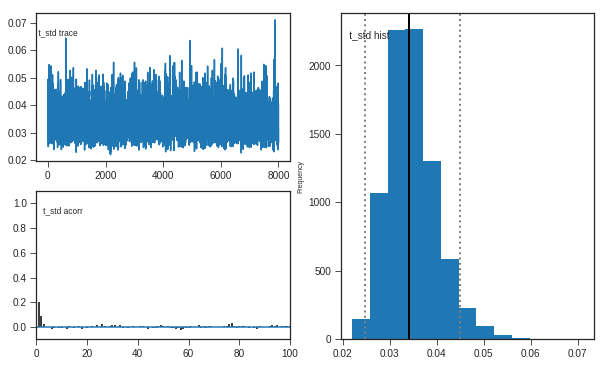

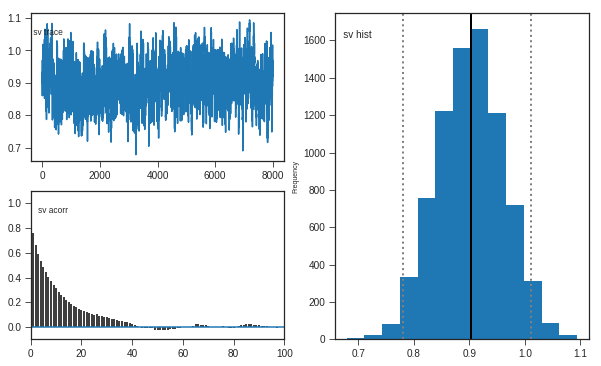

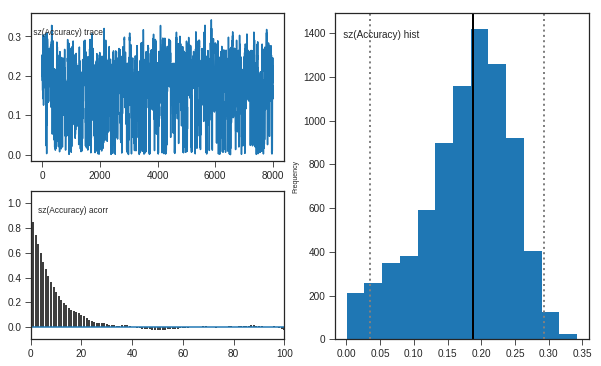

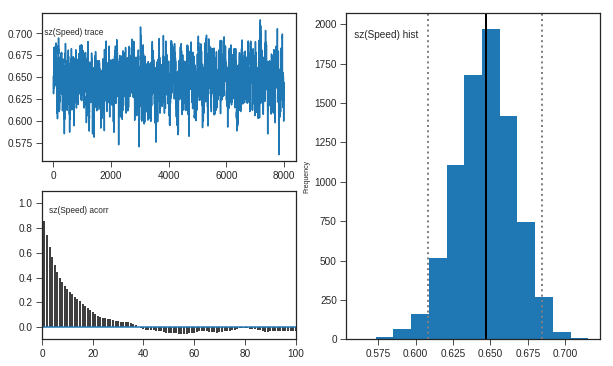

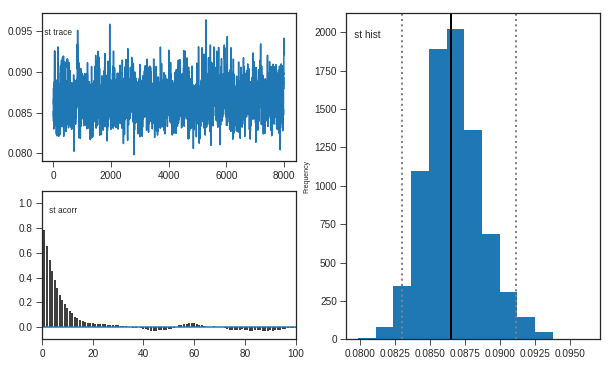

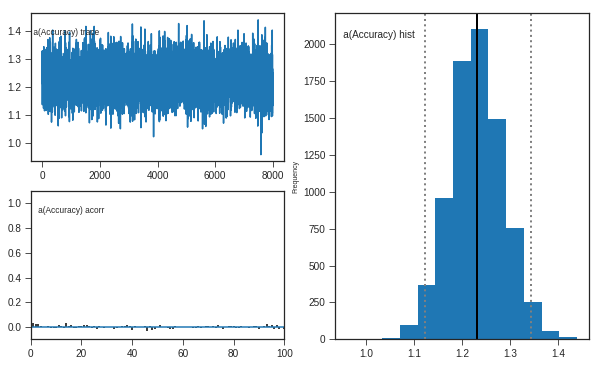

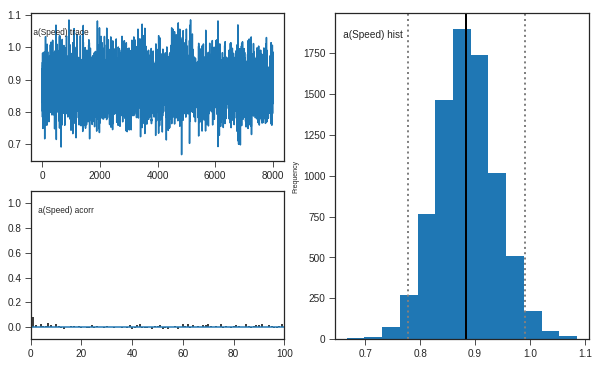

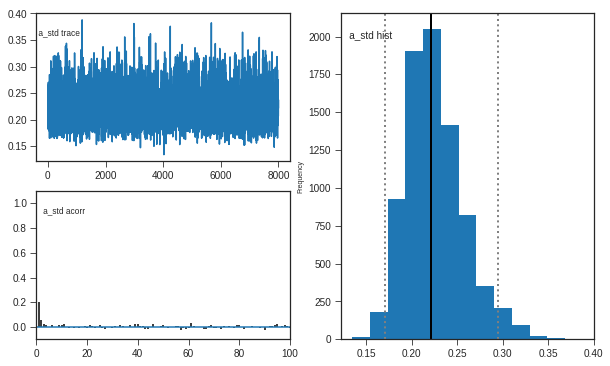

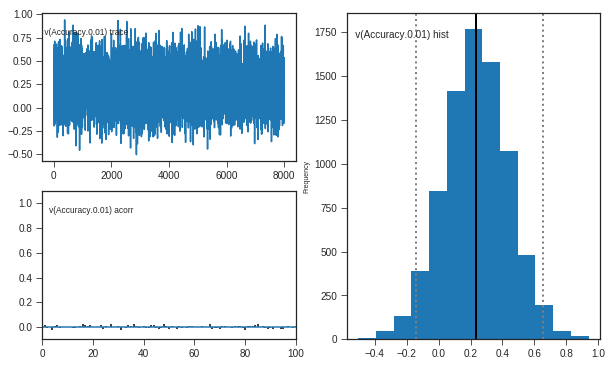

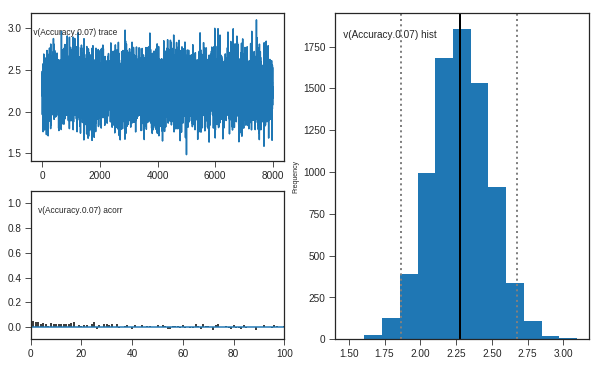

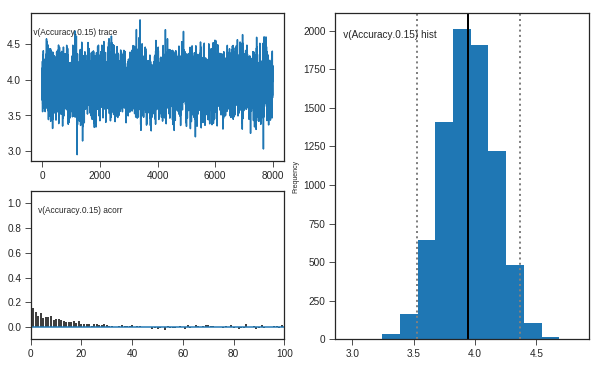

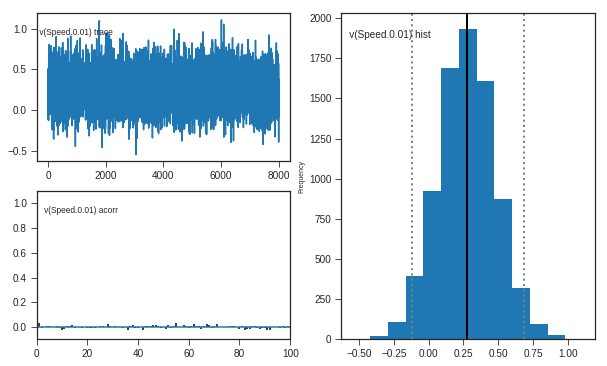

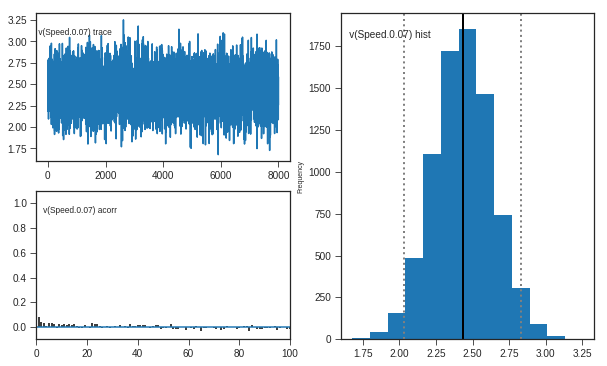

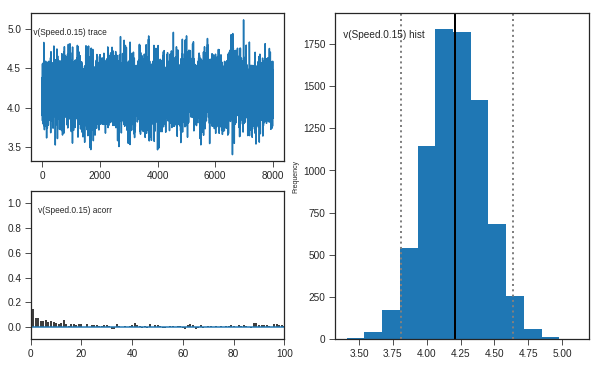

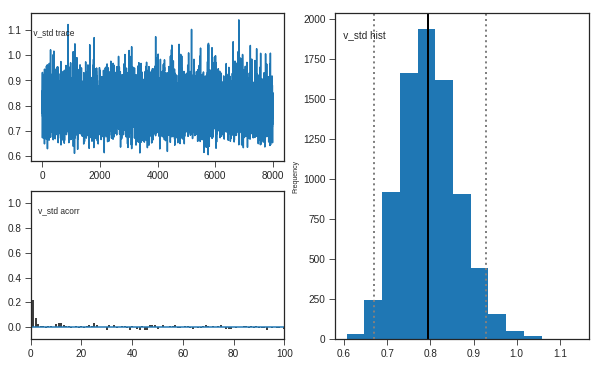

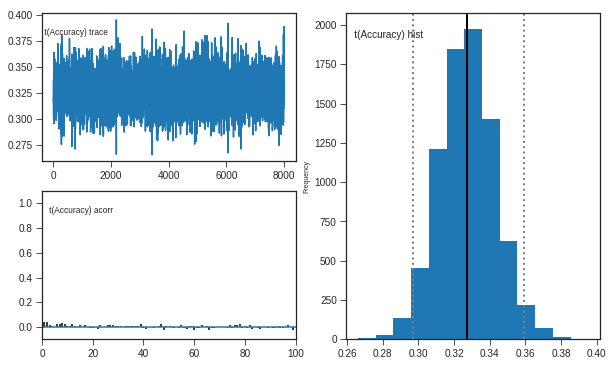

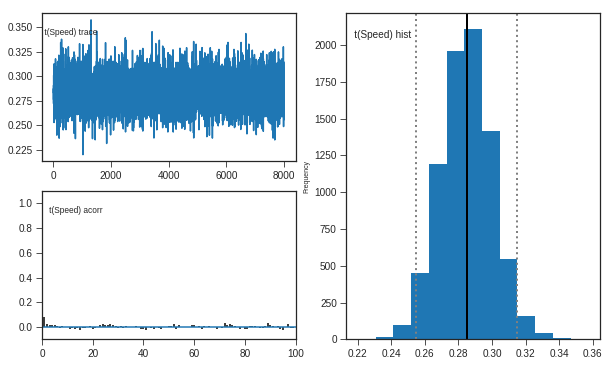

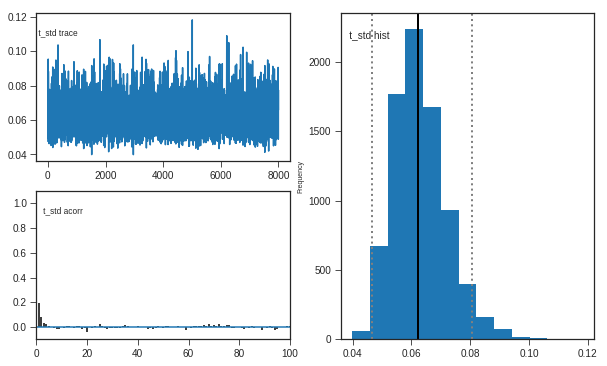

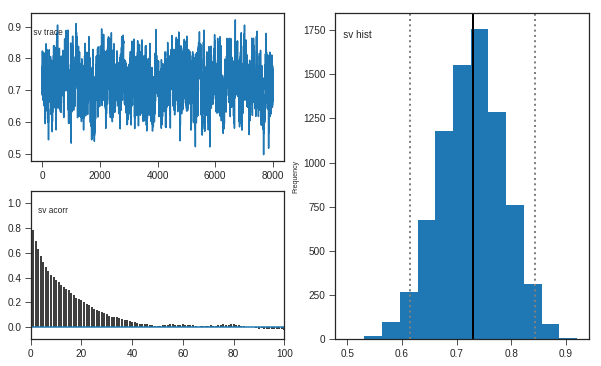

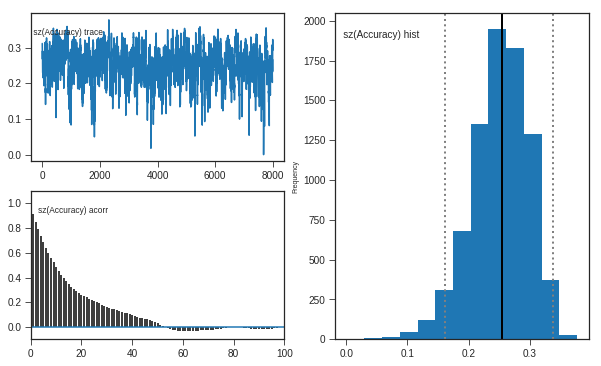

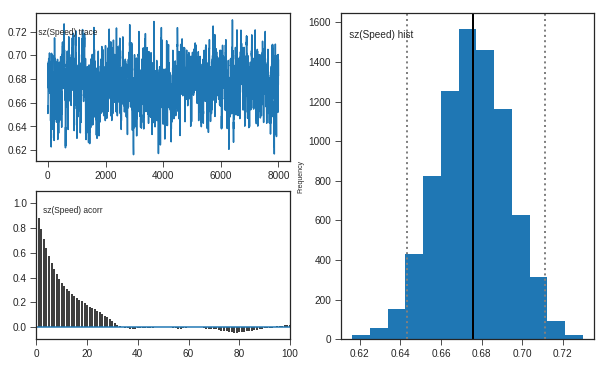

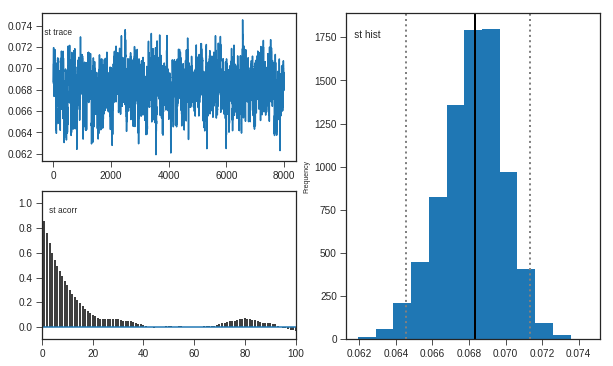

In [3]:
for name in MS_names:
    print('__________________________________________________________________\n')
    print(name)
    os.chdir('../')
    model = []
    for file in os.listdir("DDM/Fits/ModelSelection/"):
        if name in file:
            model.append(hddm.load("DDM/Fits/ModelSelection/%s"%file))
    rhat = kabuki.analyze.gelman_rubin(model) 
    model = kabuki.utils.concat_models(model)
    os.chdir("DDM/Diagnostic_plots/")
    ! mkdir $name
    os.chdir("%s"%name)
    g = model.plot_posteriors(save=True,  plot_subjs=False)#plot_subjs = True for subj parameters
    plt.close()
    plt.hist(rhat.values())
    plt.savefig('%s_rhat_dist.png'%name)
    plt.close()
    print('Rhat : ')
    print(np.max(rhat.values()))
    #model.plot_posterior_quantiles(figsize=(40,20), columns=7, data_plot_kwargs = {'color':'k', 'marker':'o'}, save=True)
    #plt.close()
    os.chdir("../../")